In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
digits = load_digits()
cancer = load_breast_cancer()

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

# Digits

In [3]:
digits.data.shape

(1797, 64)

In [4]:
#차원축소
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(digits.data) 
new_data = pca.transform(digits.data)
print('원본 데이터의 차원 \n{}'.format(digits.data.shape))
print('\nPCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)

PCA를 거친 데이터의 차원 
(1797, 2)


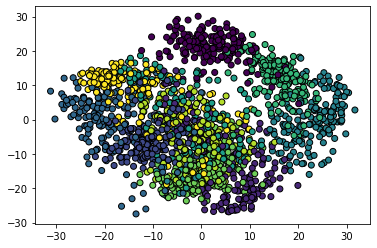

In [5]:
import matplotlib.pyplot as plt
plt.scatter(new_data[:,0], new_data[:, 1], c=digits.target, linewidth=1, edgecolor='black')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(new_data.data)

In [8]:
#차원축소한 digits데이터로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits_scaled, digits.target, test_size=0.2, random_state=2021
)

In [12]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()

In [13]:
classifiers = [dt, lr, svc, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도: {acc:.4f}')

DecisionTreeClassifier 정확도: 0.5806
LogisticRegression 정확도: 0.5722
SVC 정확도: 0.6500
KNeighborsClassifier 정확도: 0.6167


## 아......정확도...차원축소하면 안되겠네요;;ㅋ
## digits 다시 처음부터..!

In [14]:
#다시 처음부터;!!
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
import pandas as pd

df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
#digits정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(digits.data)
scaled_df = pd.DataFrame(data=digits_scaled, columns=digits.feature_names)
scaled_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits_scaled, digits.target, test_size=0.2, random_state=2021
)

In [18]:
MLP = MLPClassifier()
DT = DecisionTreeClassifier()
LR = LogisticRegression()
SVC = SVC()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(max_depth=5)

In [19]:
# 여섯개의 모델 개별적으로 학습/예측/정확도
classifiers = [MLP, DT, LR, SVC, KNN, RF]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, pred)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도: {acc:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier 정확도: 0.9778
DecisionTreeClassifier 정확도: 0.8444
LogisticRegression 정확도: 0.9528
SVC 정확도: 0.9778
KNeighborsClassifier 정확도: 0.9889
RandomForestClassifier 정확도: 0.9222


## digits 개별 모델 결과
- MinMaxScaler - KNeighborsClassifier 정확도: 0.9889 가장 높다!

In [21]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(
    estimators=[('MLP', MLP), ('LR', LR), ('SVC', SVC), ('KNN', KNN), ('RF', RF)], voting='hard'
)
vote_clf.fit(X_train, y_train)
pred = vote_clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'5개모델 앙상블 학습의 정확도: {acc:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5개모델 앙상블 학습의 정확도: 0.9806


In [22]:
# 위에서 다섯개의 모델 개별적으로 학습/예측/정확도했을때 랜덤포레스트는0.9222였는데.. 랜덤포레스트만 따로 돌리니 정확도가 0.9583으로 올라갔다?????왜그럴까??
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'랜덤 포레스트 정확도: {acc:.4f}')

랜덤 포레스트 정확도: 0.9583


In [23]:
#svc인경우, GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'C':[ 0.1, 1, 2, 3, 4, 5, 10, 100]
}

grid_clf = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5) 
grid_clf.fit(X_train, y_train)
print(f'최고 평균 정확도: {grid_clf.best_score_:.4f}')
print('최적 파라미터:', grid_clf.best_params_)

최고 평균 정확도: 0.9910
최적 파라미터: {'C': 4}


In [24]:
best_clf = grid_clf.best_estimator_
pred = best_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9805555555555555

In [25]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('model', SVC())
])

linsvc_search = {
    'model': [LinearSVC(max_iter=1000)],
    'model__C': (1e-6, 1e+6, 'log-uniform'),
}

svc_search = {
    'model': Categorical([SVC()]),
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}

opt = BayesSearchCV(
    pipe,
    # (parameter space, # of evaluations)
    [(svc_search, 40), (linsvc_search, 16)],
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

val. score: 0.9902574808629089
test score: 0.9861111111111112
best params: OrderedDict([('model', SVC(C=6010.664687715888, degree=5, gamma=0.10456433203488762)), ('model__C', 6010.664687715888), ('model__degree', 5), ('model__gamma', 0.10456433203488762), ('model__kernel', 'rbf')])


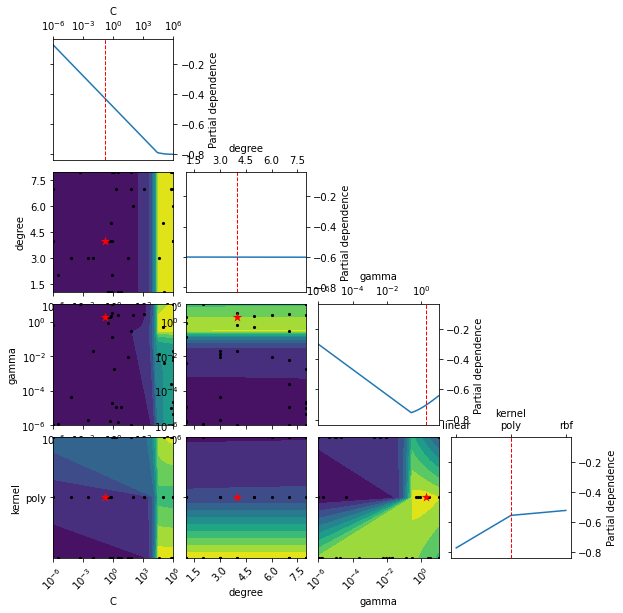

In [25]:
import matplotlib.pyplot as plt
_ = plot_objective(opt.optimizer_results_[0],
                   dimensions=["C", "degree", "gamma", "kernel"],
                   n_minimum_search=int(1e8))
plt.show()

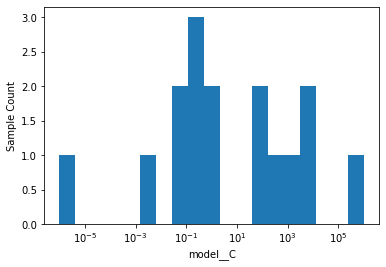

In [26]:
#LinearSVC에 대한 히스토그램 플롯
_ = plot_histogram(opt.optimizer_results_[1], 1)
plt.show()

## 결론을못내림;;ㅋㅋㅋㅋㅋㅋㅋ